In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel("D:\\Ultimate Programming\\Data Bases\\Machine Learning Datasets\\Early Disease Detection.xlsx")
df.head()

,date,country,id,active,age,alco,ap_hi,ap_lo,cholesterol,gender,gluc,height,occupation,smoke,weight,disease
0,2021-03-05,Indonesia,0,1,18393,0,110,80,1,2,1,168,Architect,0,62,0
1,2021-05-08,Malaysia,1,1,20228,0,140,90,3,1,1,156,Accountant,0,85,1
2,2022-11-13,Indonesia,2,0,18857,0,130,70,3,1,1,165,Chef,0,64,1
3,2018-10-31,Singapore,3,1,17623,0,150,100,1,2,1,169,Lawyer,0,82,1
4,2020-09-25,Singapore,4,0,17474,0,100,60,1,1,1,156,Architect,0,56,0


In [3]:
df = df.drop(['id','date', 'country', 'occupation'], axis = 1)
df.head()

,active,age,alco,ap_hi,ap_lo,cholesterol,gender,gluc,height,smoke,weight,disease
0,1,18393,0,110,80,1,2,1,168,0,62,0
1,1,20228,0,140,90,3,1,1,156,0,85,1
2,0,18857,0,130,70,3,1,1,165,0,64,1
3,1,17623,0,150,100,1,2,1,169,0,82,1
4,0,17474,0,100,60,1,1,1,156,0,56,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   active       70000 non-null  int64
 1   age          70000 non-null  int64
 2   alco         70000 non-null  int64
 3   ap_hi        70000 non-null  int64
 4   ap_lo        70000 non-null  int64
 5   cholesterol  70000 non-null  int64
 6   gender       70000 non-null  int64
 7   gluc         70000 non-null  int64
 8   height       70000 non-null  int64
 9   smoke        70000 non-null  int64
 10  weight       70000 non-null  int64
 11  disease      70000 non-null  int64
dtypes: int64(12)
memory usage: 6.4 MB


In [5]:
df.describe()

,active,age,alco,ap_hi,ap_lo,cholesterol,gender,gluc,height,smoke,weight,disease
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,0.803729,19468.865814,0.053771,128.817286,96.630414,1.366871,1.349571,1.226457,164.359229,0.088129,74.205543,0.499700
std,0.397179,2467.251667,0.225568,154.011419,188.472530,0.680250,0.476838,0.572270,8.210126,0.283484,14.395829,0.500003
min,0.000000,10798.000000,0.000000,-150.000000,-70.000000,1.000000,1.000000,1.000000,55.000000,0.000000,10.000000,0.000000
25%,1.000000,17664.000000,0.000000,120.000000,80.000000,1.000000,1.000000,1.000000,159.000000,0.000000,65.000000,0.000000
50%,1.000000,19703.000000,0.000000,120.000000,80.000000,1.000000,1.000000,1.000000,165.000000,0.000000,72.000000,0.000000
75%,1.000000,21327.000000,0.000000,140.000000,90.000000,2.000000,2.000000,1.000000,170.000000,0.000000,82.000000,1.000000
max,1.000000,23713.000000,1.000000,16020.000000,11000.000000,3.000000,2.000000,3.000000,250.000000,1.000000,200.000000,1.000000


In [6]:
# Standardizing the data

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
pd.DataFrame(df_scaled).describe()

,0,1,2,3,4,5,6,7,8,9,10,11
count,7.000000e+04,7.000000e+04,7.000000e+04,7.000000e+04,7.000000e+04,7.000000e+04,7.000000e+04,7.000000e+04,7.000000e+04,7.000000e+04,7.000000e+04,7.000000e+04
mean,-8.414856e-17,5.272227e-16,4.912895e-17,7.623108e-17,1.745905e-17,1.381498e-16,-1.644399e-16,-1.327700e-16,1.450116e-15,7.876874e-17,-1.506351e-16,5.684342e-17
std,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00
min,-2.023607e+00,-3.514407e+00,-2.383844e-01,-1.810381e+00,-8.841161e-01,-5.393221e-01,-7.331083e-01,-3.957199e-01,-1.332014e+01,-3.108791e-01,-4.460042e+00,-9.994002e-01
25%,4.941671e-01,-7.315341e-01,-2.383844e-01,-5.725127e-02,-8.823850e-02,-5.393221e-01,-7.331083e-01,-3.957199e-01,-6.527630e-01,-3.108791e-01,-6.394636e-01,-9.994002e-01
50%,4.941671e-01,9.489744e-02,-2.383844e-01,-5.725127e-02,-8.823850e-02,-5.393221e-01,-7.331083e-01,-3.957199e-01,7.804703e-02,-3.108791e-01,-1.532082e-01,-9.994002e-01
75%,4.941671e-01,7.531244e-01,-2.383844e-01,7.261016e-02,-3.517999e-02,9.307354e-01,1.364055e+00,-3.957199e-01,6.870554e-01,-3.108791e-01,5.414425e-01,1.000600e+00
max,4.941671e-01,1.720199e+00,4.194906e+00,1.031826e+02,5.785165e+01,2.400793e+00,1.364055e+00,3.099157e+00,1.043119e+01,3.216684e+00,8.738320e+00,1.000600e+00


In [7]:
from sklearn.cluster import KMeans
kmeans = KMeans(init='k-means++')
kmeans.fit(df_scaled)
kmeans.inertia_

  File "C:\Program Files\Python313\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\Program Files\Python313\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Program Files\Python313\Lib\subprocess.py", line 1036, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
                        pass_fds, cwd, env,
                        ^^^^^^^^^^^^^^^^^^^
    ...<5 lines>...
                        gid, gids, uid, umask,
                        ^^^^^^^^^^^^^^^^^^^^^^
                        start_new_session, process_group)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Program Files\Python313\Lib\sub

461642.1288859733

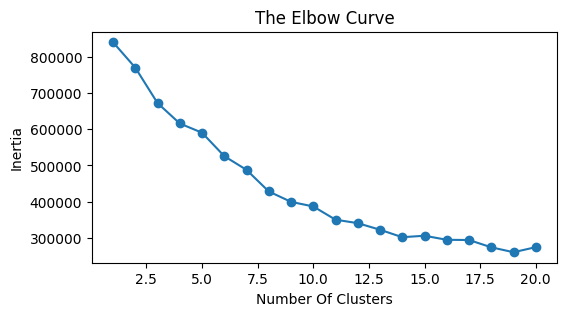

In [8]:
wcss = []

for i in range(1,21):
    kmeans = KMeans(n_clusters=i, init='k-means++')
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(6,3))
plt.plot(range(1,21),wcss, marker='o')
plt.title('The Elbow Curve')
plt.xlabel('Number Of Clusters')
plt.ylabel('Inertia')
plt.show()

In [9]:
# Build the model with the 8 clusters

kmeans = KMeans(n_clusters=8, init='k-means++')
kmeans.fit(df_scaled)
pred = kmeans.predict(df_scaled)

df = pd.DataFrame(df_scaled)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.494167,-0.436062,-0.238384,-0.122182,-0.088238,-0.539322,1.364055,-0.39572,0.443452,-0.310879,-0.847859,-0.9994
1,0.494167,0.307686,-0.238384,0.072610,-0.035180,2.400793,-0.733108,-0.39572,-1.018168,-0.310879,0.749838,1.0006
2,-2.023607,-0.247997,-0.238384,0.007679,-0.141297,2.400793,-0.733108,-0.39572,0.078047,-0.310879,-0.708929,1.0006
3,0.494167,-0.748152,-0.238384,0.137541,0.017879,-0.539322,1.364055,-0.39572,0.565254,-0.310879,0.541442,1.0006
4,-2.023607,-0.808543,-0.238384,-0.187113,-0.194356,-0.539322,-0.733108,-0.39572,-1.018168,-0.310879,-1.264649,-0.9994


In [10]:
df['cluster'] = pred
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,cluster
0,0.494167,-0.436062,-0.238384,-0.122182,-0.088238,-0.539322,1.364055,-0.39572,0.443452,-0.310879,-0.847859,-0.9994,4
1,0.494167,0.307686,-0.238384,0.072610,-0.035180,2.400793,-0.733108,-0.39572,-1.018168,-0.310879,0.749838,1.0006,3
2,-2.023607,-0.247997,-0.238384,0.007679,-0.141297,2.400793,-0.733108,-0.39572,0.078047,-0.310879,-0.708929,1.0006,3
3,0.494167,-0.748152,-0.238384,0.137541,0.017879,-0.539322,1.364055,-0.39572,0.565254,-0.310879,0.541442,1.0006,5
4,-2.023607,-0.808543,-0.238384,-0.187113,-0.194356,-0.539322,-0.733108,-0.39572,-1.018168,-0.310879,-1.264649,-0.9994,0


In [11]:
df['cluster'].value_counts()

cluster
0    19512
3    17671
5     8550
4     8322
7     4142
2     4135
6     3956
1     3712
Name: count, dtype: int64

In [12]:
df.head(1)

,0,1,2,3,4,5,6,7,8,9,10,11,cluster
0,0.494167,-0.436062,-0.238384,-0.122182,-0.088238,-0.539322,1.364055,-0.39572,0.443452,-0.310879,-0.847859,-0.9994,4


In [13]:
# Function to take input, standardize it, and
def get_cluster_prediction():
    try:
        active = int(input("Enter active (1 for Yes, 0 for No): "))
        age = int(input("Enter age (in days, e.g., 18393): "))
        alco = int(input("Enter alco (1 for Yes, 0 for No): "))
        ap_hi = int(input("Enter systolic blood pressure (e.g., 110): "))
        ap_lo = int(input("Enter diastolic blood pressure (e.g., 80): "))
        cholesterol = int(input("Enter cholesterol level (1: normal, 2: above normal, 3: well above normal): "))
        gender = int(input("Enter gender (1: Male, 2: Female): "))
        gluc = int(input("Enter glucose level (1: normal, 2: above normal, 3: well above normal): "))
        height = float(input("Enter height (in cm, e.g., 168): "))
        smoke = int(input("Enter smoke status (1: Yes, 0 for No): "))
        weight = float(input("Enter weight (in kg, e.g., 62): "))
        disease = int(input("Enter disease status (1: Yes, 0 for No): "))
        
        # Create a data point with the input values
        user_data = np.array([[active, age, alco, ap_hi, ap_lo, cholesterol, gender, gluc, height, smoke, weight, disease]])

        # Standardize the input data
        standardized_data = scaler.transform(user_data)

        # Predict the cluster
        cluster_label = kmeans.predict(standardized_data)

        return f"The predicted cluster for the input data is: {cluster_label[0]}"
    except Exception as e:
        return f"Error: {str(e)}"

In [14]:
get_cluster_prediction()

Enter active (1 for Yes, 0 for No):  1
Enter age (in days, e.g., 18393):  18394
Enter alco (1 for Yes, 0 for No):  0
Enter systolic blood pressure (e.g., 110):  120
Enter diastolic blood pressure (e.g., 80):  89
Enter cholesterol level (1: normal, 2: above normal, 3: well above normal):  1
Enter gender (1: Male, 2: Female):  1
Enter glucose level (1: normal, 2: above normal, 3: well above normal):  1
Enter height (in cm, e.g., 168):  180
Enter smoke status (1: Yes, 0 for No):  0
Enter weight (in kg, e.g., 62):  69
Enter disease status (1: Yes, 0 for No):  0


'The predicted cluster for the input data is: 0'

In [22]:
import joblib

In [31]:
joblib.dump("K Means Clustering", "Detection_joblib.joblib")

['Detection_joblib.joblib']

In [33]:
import os
print(os.path.exists("Detection_joblib.joblib"))

True


In [28]:
import os
print(os.path.exists(r"D:\Ultimate Programming\Machine Learning\InternShala Project\Early Disease Detection\Detection_joblib"))

False
